# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = '/input/R5KrjnANiKVhLWAkpXhNBe'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Extracting mnist: 100%|██████████| 60.0K/60.0K [00:11<00:00, 5.33KFile/s]


Extracting celeba...


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

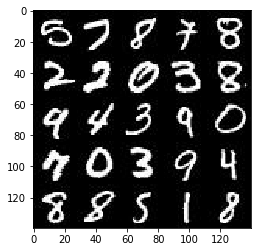

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

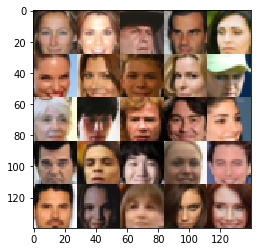

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width  --> 28
    :param image_height: The input image height --> 28
    :param image_channels: The number of image channels --> 3
    :param z_dim: The dimension of Z --> 100
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    tensor_real_imput_img = tf.placeholder(tf.float32, shape=(None, image_width, image_height, image_channels))
    tensor_z_data = tf.placeholder(tf.float32, shape=(None, z_dim))
    learning_rate = tf.placeholder(tf.float32)

    return (tensor_real_imput_img, tensor_z_data, learning_rate)

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False, alpha=0.2):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)--> Tensor("Placeholder:0", shape=(?, 28, 28, 3), dtype=float32)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        # input layer --> 28, 28, 3
        
        start_dim = 28*2
        kernel_sz = 5
        strides = 2

        layer_0 = tf.layers.conv2d(images, start_dim, kernel_sz, strides=strides, padding='same')
        relu_0 = tf.maximum(alpha * layer_0, layer_0)
        #14*14*56
        
        layer_1 = tf.layers.conv2d(relu_0, start_dim*2, kernel_sz, strides=strides, padding='same')
        batchnorm_1 = tf.layers.batch_normalization(layer_1, training=True)
        relu_1 = tf.maximum(alpha * batchnorm_1, batchnorm_1)
        #  7, 7, 112
        
        layer_2 = tf.layers.conv2d(relu_1, start_dim*4, kernel_sz, strides=strides, padding='same')
        batchnorm_2 = tf.layers.batch_normalization(layer_2, training=True)
        relu_2 = tf.maximum(alpha * batchnorm_2, batchnorm_2)
        #4, 4, 224
        
        layer_3 = tf.layers.conv2d(relu_2, start_dim*8, kernel_sz, strides=strides, padding='same')
        batchnorm_3 = tf.layers.batch_normalization(layer_2, training=True)
        relu_3 = tf.maximum(alpha * batchnorm_3, batchnorm_3)
        #4, 4, 224
        
        flatten = tf.reshape(relu_3, (-1, (start_dim*4)*4*4)) 
            
        logits = tf.layers.dense(flatten, 1)
        output = tf.sigmoid(logits)

    return (output, logits)

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True, alpha=0.2):
    """
    Create the generator network
    :param z: Input z --> Tensor("Placeholder:0", shape=(?, 100), dtype=float32)
    :param out_channel_dim: The number of channels in the output image --> 5
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse=not is_train):
        start_dim = 512
        kernel_sz = 5
        strides = 2

        layer_0 = tf.layers.dense(z, 7*7*start_dim)
    
        layer_0 = tf.reshape(layer_0, (-1, 7, 7, start_dim))
        layer_0 = tf.layers.batch_normalization(layer_0, training=is_train)
        # 7, 7, 512 
      
        layer_1 = tf.layers.conv2d_transpose(layer_0, int(start_dim/2), kernel_sz, strides=strides, padding='same')
        layer_1 = tf.layers.batch_normalization(layer_1, training=is_train)
        relu_1 = tf.maximum(alpha * layer_1, layer_1)
        # 14, 14, 256
    
        layer_2 = tf.layers.conv2d_transpose(layer_1, int(start_dim/4), kernel_sz, strides=strides, padding='same')
        layer_2 = tf.layers.batch_normalization(layer_2, training=is_train)
        relu_2 = tf. maximum(alpha * layer_2, layer_2)
        # 28, 28, 128
        
        layer_3 = tf.layers.conv2d_transpose(layer_2, int(start_dim/8), kernel_sz, strides=strides, padding='same')
        layer_3 = tf.layers.batch_normalization(layer_3, training=is_train)
        relu_3 = tf. maximum(alpha * layer_3, layer_3)
        relu_3_d = tf.nn.dropout(relu_3, 0.75)
        # 28, 28, 128

    
        logits = tf.layers.conv2d_transpose(relu_3_d, out_channel_dim, kernel_sz, strides=strides, padding='same')
        logits = tf.reshape(logits, (-1, 28, 28, out_channel_dim))
        # 28, 28, 5
        output = tf.tanh(logits)
        
        return output


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    smooth = 0.1
    alpha = 0.2
    
    #generator with z input
    g_mod = generator(input_z, out_channel_dim, alpha=alpha)
    
    # discriminator with real input and g_mod output
    d_out_real, d_log_real = discriminator(input_real, alpha=alpha)
    d_out_fake, d_log_fake = discriminator(g_mod, reuse=True, alpha=alpha)
    
    d_loss_real = tf.reduce_mean(
                                tf.nn.sigmoid_cross_entropy_with_logits(
                                    logits=d_log_real,
                                    labels=tf.ones_like(d_out_real)*0.9
                                 ))
    
    d_loss_fake = tf.reduce_mean(
                                tf.nn.sigmoid_cross_entropy_with_logits(
                                logits=d_log_fake,
                                labels=tf.zeros_like(d_out_fake)))
    
    d_loss = d_loss_real + d_loss_fake
    
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_log_fake,
                                                                 labels=tf.ones_like(d_out_fake)))
    
    
    return (d_loss, g_loss)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer --> 0.9 (eg less than 1)
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    train_vars = tf.trainable_variables()
    
    #variable generators with shape (3,3), float32
    d_vars = [var for var in train_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in train_vars if var.name.startswith('generator')]
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_op = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_op = tf.train.AdamOptimizer(learning_rate,beta1=beta1).minimize(g_loss, var_list=g_vars)

    return (d_train_op, g_train_op)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches,
          data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension --> 100
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data  --> (60000, 28, 28, 1)
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    steps = 0
    div_by = 20
    n_images = 10
    image_mode="RGB"
    samples=[]
    
    input_real, input_z, lr = model_inputs(data_shape[1], 
                                                      data_shape[2], 
                                                      data_shape[3], 
                                                      z_dim)
    # --> Tensor("Placeholder:0", shape=(?, 28, 28, 1), dtype=float32) 
    # Tensor("Placeholder_1:0", shape=(?, 100), dtype=float32)
    # Tensor("Placeholder_2:0", dtype=float32)
            
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
    # --> Tensor("add:0", shape=(), dtype=float32), Tensor("Mean_2:0", shape=(), dtype=float32) 
    
    d_train_op, g_train_op = model_opt(d_loss, g_loss, learning_rate, beta1)
     

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                batch_images = batch_images * 2
                # sample random noise
                z_batch = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                # engage optimizers for discriminator and generator
                _ = sess.run(d_train_op, feed_dict={input_real: batch_images,
                                                    input_z: z_batch, 
                                                    lr:learning_rate})
                _ = sess.run(g_train_op, feed_dict={input_real: batch_images,
                                                    input_z: z_batch,
                                                    lr: learning_rate})
        
            
                # get losses for printing every n steps
                if steps % 50 == 0:
                    d_train_loss = d_loss.eval({input_real: batch_images, input_z: z_batch})
                    g_train_loss = g_loss.eval({input_z: z_batch})

                    print("Epoch {}/{} {} steps".format(epoch_i+1, epochs, steps), 
                         "- training losses: "
                         " discriminator: {:.4f}".format(d_train_loss),
                         "| generator {:.4f}".format(g_train_loss))
                    
                    if steps % 100 == 0:
                        if data_shape[3] == 1:
                            image_mode= "L"
                        show_generator_output(sess, 10, input_z, data_shape[3], image_mode)

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2 50 steps - training losses:  discriminator: 0.6048 | generator 2.7204
Epoch 1/2 100 steps - training losses:  discriminator: 1.3868 | generator 3.2464


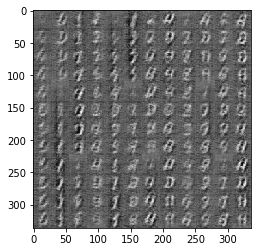

Epoch 1/2 150 steps - training losses:  discriminator: 1.0640 | generator 0.7322
Epoch 1/2 200 steps - training losses:  discriminator: 0.8936 | generator 1.1337


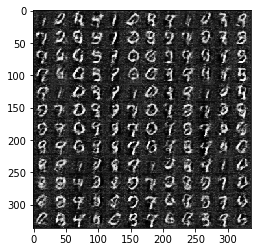

Epoch 1/2 250 steps - training losses:  discriminator: 1.0135 | generator 1.9498
Epoch 1/2 300 steps - training losses:  discriminator: 0.9307 | generator 1.4216


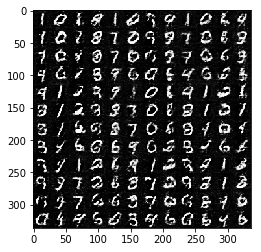

Epoch 1/2 350 steps - training losses:  discriminator: 0.9410 | generator 1.2220
Epoch 1/2 400 steps - training losses:  discriminator: 1.0046 | generator 0.9657


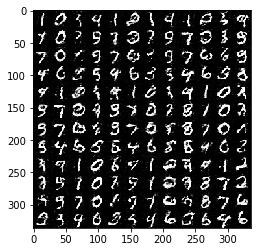

Epoch 1/2 450 steps - training losses:  discriminator: 1.0139 | generator 0.9051
Epoch 1/2 500 steps - training losses:  discriminator: 1.0732 | generator 1.5241


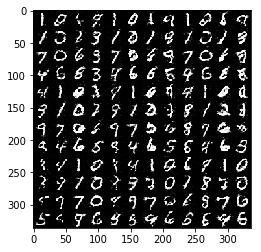

Epoch 1/2 550 steps - training losses:  discriminator: 1.1296 | generator 0.6953
Epoch 1/2 600 steps - training losses:  discriminator: 1.0298 | generator 1.3820


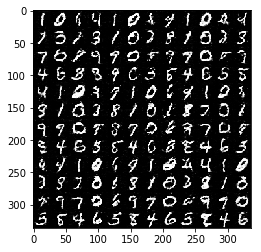

Epoch 1/2 650 steps - training losses:  discriminator: 1.0829 | generator 1.4715
Epoch 1/2 700 steps - training losses:  discriminator: 1.1049 | generator 1.5010


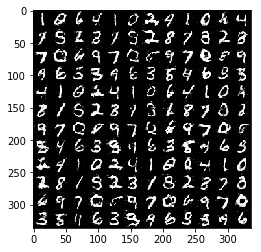

Epoch 1/2 750 steps - training losses:  discriminator: 1.0553 | generator 1.3656
Epoch 1/2 800 steps - training losses:  discriminator: 1.2518 | generator 2.1822


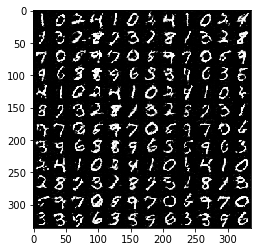

Epoch 1/2 850 steps - training losses:  discriminator: 1.0087 | generator 1.6902
Epoch 1/2 900 steps - training losses:  discriminator: 1.1393 | generator 0.6766


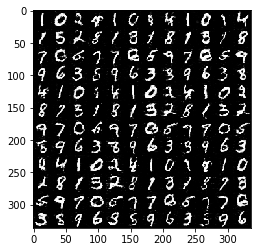

Epoch 2/2 950 steps - training losses:  discriminator: 0.8869 | generator 1.6713
Epoch 2/2 1000 steps - training losses:  discriminator: 1.4540 | generator 2.3034


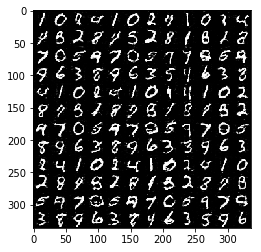

Epoch 2/2 1050 steps - training losses:  discriminator: 0.8622 | generator 1.1447
Epoch 2/2 1100 steps - training losses:  discriminator: 0.9279 | generator 1.3318


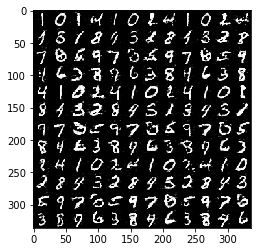

Epoch 2/2 1150 steps - training losses:  discriminator: 0.8427 | generator 1.8106
Epoch 2/2 1200 steps - training losses:  discriminator: 0.9495 | generator 1.3799


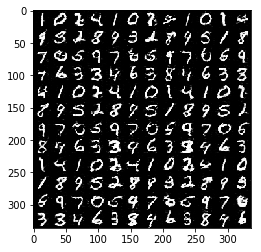

Epoch 2/2 1250 steps - training losses:  discriminator: 1.4920 | generator 2.6228
Epoch 2/2 1300 steps - training losses:  discriminator: 1.0875 | generator 0.7107


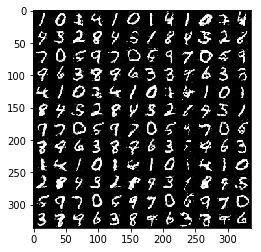

Epoch 2/2 1350 steps - training losses:  discriminator: 0.8131 | generator 2.0113
Epoch 2/2 1400 steps - training losses:  discriminator: 0.9029 | generator 1.0972


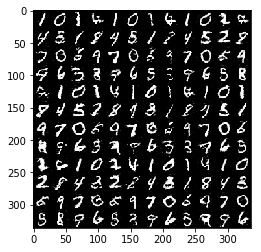

Epoch 2/2 1450 steps - training losses:  discriminator: 1.0548 | generator 0.7553
Epoch 2/2 1500 steps - training losses:  discriminator: 0.8132 | generator 1.1804


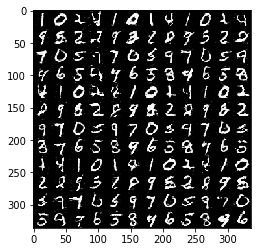

Epoch 2/2 1550 steps - training losses:  discriminator: 0.7821 | generator 1.4060
Epoch 2/2 1600 steps - training losses:  discriminator: 0.7841 | generator 1.7279


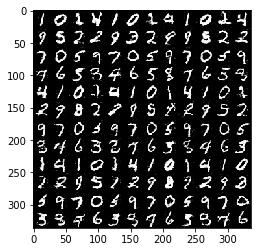

Epoch 2/2 1650 steps - training losses:  discriminator: 0.7450 | generator 1.4717
Epoch 2/2 1700 steps - training losses:  discriminator: 0.7752 | generator 1.3720


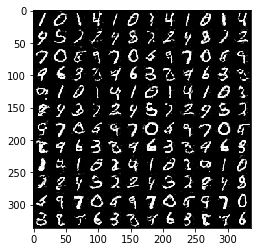

Epoch 2/2 1750 steps - training losses:  discriminator: 0.9371 | generator 0.9445
Epoch 2/2 1800 steps - training losses:  discriminator: 0.7595 | generator 1.4433


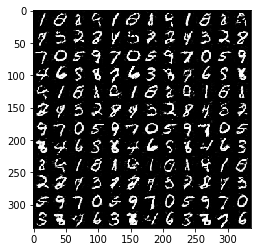

Epoch 2/2 1850 steps - training losses:  discriminator: 0.7239 | generator 1.2979


In [13]:
batch_size = 64 
z_dim = 100 
learning_rate = 0.0002
beta1 = 0.4 


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1 50 steps - training losses:  discriminator: 0.6156 | generator 2.6272
Epoch 1/1 100 steps - training losses:  discriminator: 0.6384 | generator 1.9330


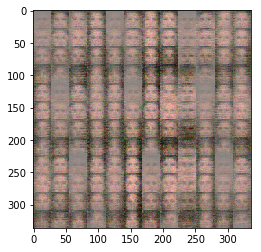

Epoch 1/1 150 steps - training losses:  discriminator: 1.5319 | generator 4.6764
Epoch 1/1 200 steps - training losses:  discriminator: 0.4794 | generator 2.3051


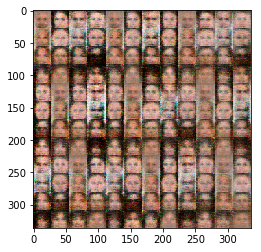

Epoch 1/1 250 steps - training losses:  discriminator: 0.8304 | generator 3.3416
Epoch 1/1 300 steps - training losses:  discriminator: 0.7889 | generator 2.1381


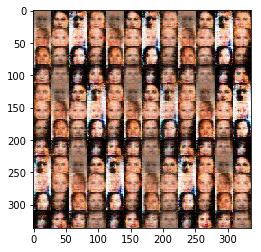

Epoch 1/1 350 steps - training losses:  discriminator: 0.5183 | generator 2.0799
Epoch 1/1 400 steps - training losses:  discriminator: 0.4011 | generator 3.2536


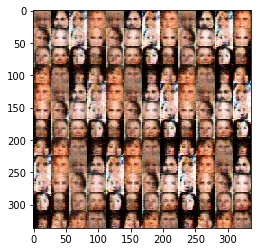

Epoch 1/1 450 steps - training losses:  discriminator: 1.5687 | generator 4.3499
Epoch 1/1 500 steps - training losses:  discriminator: 0.4171 | generator 2.8243


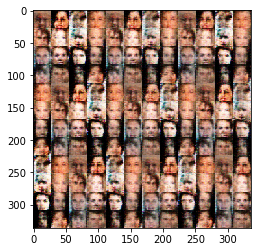

Epoch 1/1 550 steps - training losses:  discriminator: 5.7356 | generator 0.0196
Epoch 1/1 600 steps - training losses:  discriminator: 0.4210 | generator 3.4799


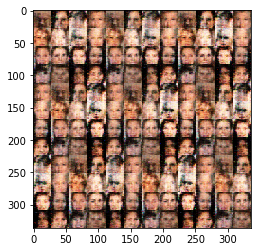

Epoch 1/1 650 steps - training losses:  discriminator: 0.3742 | generator 3.7786
Epoch 1/1 700 steps - training losses:  discriminator: 0.7342 | generator 1.7074


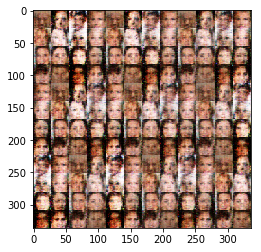

Epoch 1/1 750 steps - training losses:  discriminator: 0.5074 | generator 2.3366
Epoch 1/1 800 steps - training losses:  discriminator: 0.4705 | generator 2.7261


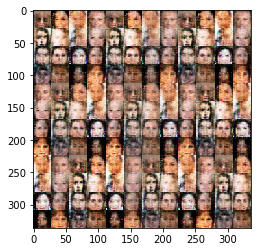

Epoch 1/1 850 steps - training losses:  discriminator: 0.4443 | generator 2.5870
Epoch 1/1 900 steps - training losses:  discriminator: 0.4316 | generator 3.4535


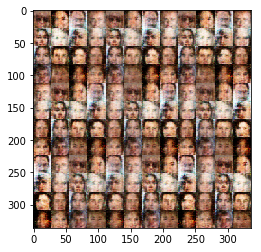

Epoch 1/1 950 steps - training losses:  discriminator: 1.9894 | generator 0.5145
Epoch 1/1 1000 steps - training losses:  discriminator: 0.5161 | generator 2.1076


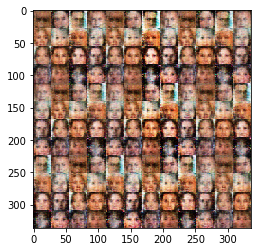

Epoch 1/1 1050 steps - training losses:  discriminator: 0.5141 | generator 2.6625
Epoch 1/1 1100 steps - training losses:  discriminator: 0.4151 | generator 3.6157


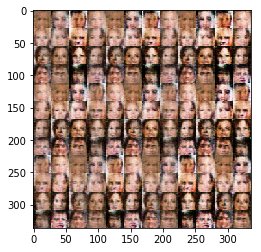

Epoch 1/1 1150 steps - training losses:  discriminator: 0.7367 | generator 1.2190
Epoch 1/1 1200 steps - training losses:  discriminator: 0.3999 | generator 3.1020


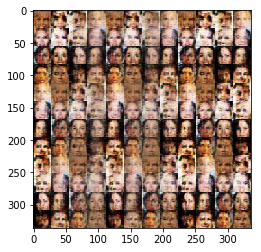

Epoch 1/1 1250 steps - training losses:  discriminator: 0.3849 | generator 3.5508
Epoch 1/1 1300 steps - training losses:  discriminator: 0.5909 | generator 1.6733


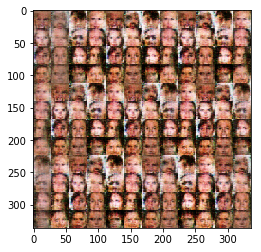

Epoch 1/1 1350 steps - training losses:  discriminator: 0.3853 | generator 3.7490
Epoch 1/1 1400 steps - training losses:  discriminator: 0.6401 | generator 1.6904


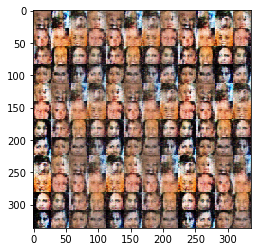

Epoch 1/1 1450 steps - training losses:  discriminator: 0.8178 | generator 1.1060
Epoch 1/1 1500 steps - training losses:  discriminator: 0.3758 | generator 4.2737


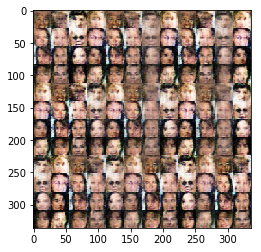

Epoch 1/1 1550 steps - training losses:  discriminator: 0.3980 | generator 3.1707
Epoch 1/1 1600 steps - training losses:  discriminator: 0.3915 | generator 3.9286


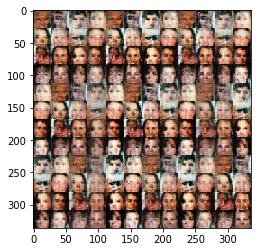

Epoch 1/1 1650 steps - training losses:  discriminator: 0.3831 | generator 3.3344
Epoch 1/1 1700 steps - training losses:  discriminator: 0.4797 | generator 2.0342


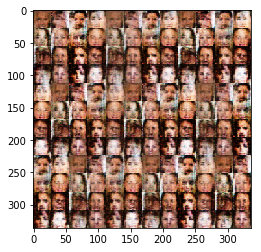

Epoch 1/1 1750 steps - training losses:  discriminator: 0.3710 | generator 3.5017
Epoch 1/1 1800 steps - training losses:  discriminator: 0.4135 | generator 3.4350


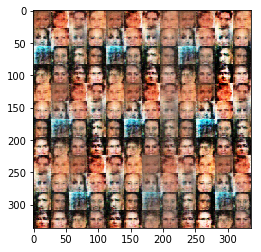

Epoch 1/1 1850 steps - training losses:  discriminator: 1.0761 | generator 0.7898
Epoch 1/1 1900 steps - training losses:  discriminator: 0.4653 | generator 2.4530


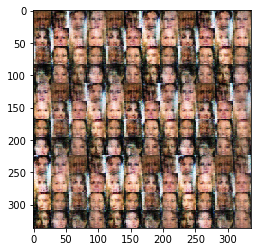

Epoch 1/1 1950 steps - training losses:  discriminator: 0.3902 | generator 3.0759
Epoch 1/1 2000 steps - training losses:  discriminator: 0.5718 | generator 4.2153


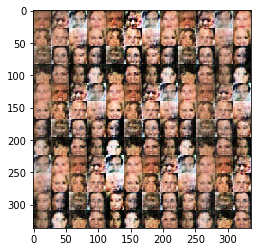

Epoch 1/1 2050 steps - training losses:  discriminator: 0.4120 | generator 3.3907
Epoch 1/1 2100 steps - training losses:  discriminator: 0.3762 | generator 3.5069


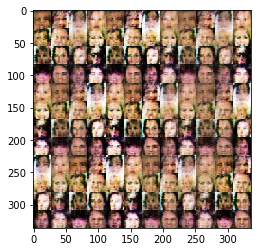

Epoch 1/1 2150 steps - training losses:  discriminator: 0.4013 | generator 3.2592


In [ ]:
batch_size = 32
z_dim = 100 
learning_rate = 0.0002
beta1 = 0.4

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.